# Machine Learning Project(Titanic dataset)

PROBLEM STATEMENT : 

Titanic Dataset for Classifying whether or not a person survived the sinking of the Titanic.

You are provided the titanic dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
Data cleaning plays a major role in this question.
       i. Check for missing values

       ii. Drop Columns & Handle missing values

       iii. Create dummies for categorical features

  3.you are free to perform other data cleaning to improve your results.

  4.Report accuracy score, Confusion matrix, heat map, classification report, and any other metrics you feel useful.

COLUMNS DESCRIPTION  :

survival - Survival (0 = No; 1 = Yes)

PassengerId: Unique Id of a passenger.

pclass:   Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  
Name : name of passanger

sex:    Sex     
Age:    Age in years     
sibsp:    Number of siblings / spouses aboard the Titanic     
parch:    Number of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkation(C = Cherbourg; Q = Queenstown; S = Southampton)

# IMPORT LIBRARIES

In [1]:
#data processing
import pandas as pd

#Linear Algebra
import numpy as np

#for data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

In [2]:
#what is the use of %matplotlib inline
#https://pythonguides.com/what-is-matplotlib-inline/

# Reading the Dataset

In [3]:
#Reading the titanic dataset using pandas and storing it in the 'titanic' variable.

titanic = pd.read_csv('titanic.csv')

In [4]:
#Printing first few records

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#printlast 5 records
titanic.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Exploratory Data Analysis

In [5]:
#Information about the dataset

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
type(titanic)

pandas.core.frame.DataFrame

In [7]:
# we can see that there are total 12 columns

# 5 columns data type is integer

# 5 columns data type is object

# 2 columns data type is float 


In [9]:
#Columns in the dataset

titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
#Total rows and columns in the dataset

titanic.shape

(891, 12)

In [11]:
# data type of each column in the dataset

titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
#It gives statstics values only for numeric columns in the dataset

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#from above ootput we can say that 38% people survived(with respect to this dataset)(from mean value for survived)

# Missing Data 

In [14]:
#checking for null values

titanic.isnull().sum()

#Age, Cabin, Embarked column has missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
#function to display column names and their data type.

obj = []   
intgr = []
flt = []
for i in titanic.columns:
    if(titanic[i].dtype == 'object'):
        obj.append(i)
    elif(titanic[i].dtype == 'int64'):
        intgr.append(i)
    else:
        flt.append(i)

print(obj," these columns data type is Object.")
print(intgr," these columns data type is Integer.")   
print(flt," these columns data type is Float.")   

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']  these columns data type is Object.
['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']  these columns data type is Integer.
['Age', 'Fare']  these columns data type is Float.


In [20]:
titanic['Name'].dtype == object

True

# Analysing Features of a dataset

<AxesSubplot:xlabel='Survived', ylabel='count'>

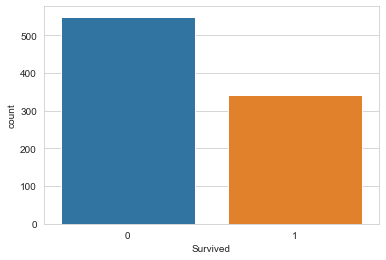

In [27]:
#To get a count of people who survived

sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic)

In [32]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [33]:
# we can see that 549 people died and 342 are alive in the accident.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

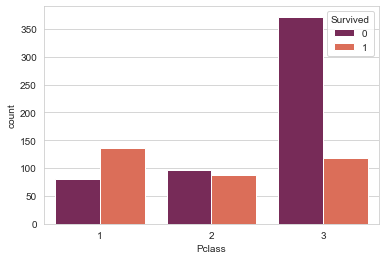

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass',hue='Survived',data=titanic,palette='rocket')

<AxesSubplot:xlabel='Survived', ylabel='count'>

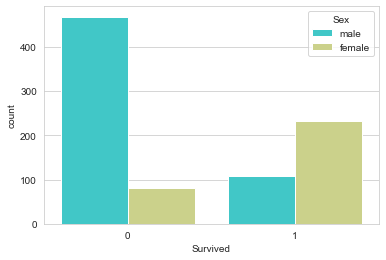

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='rainbow')

C:\Users\USER PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

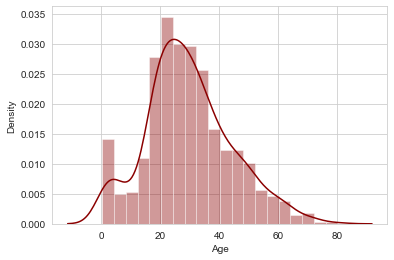

In [44]:
sns.distplot(titanic['Age'].dropna(),kde=True,color='darkred',bins=20)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

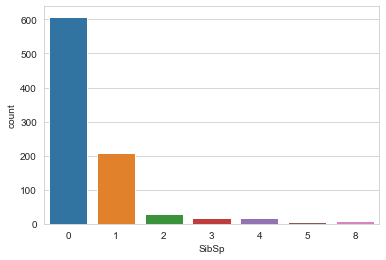

In [41]:
sns.countplot(x='SibSp',data=titanic)

<AxesSubplot:>

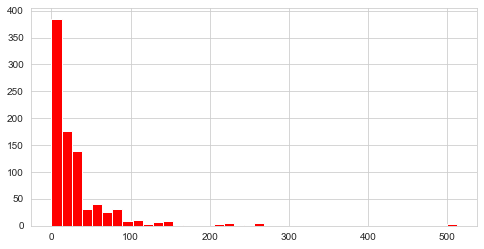

In [48]:
titanic['Fare'].hist(color='red',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='Sex', ylabel='Age'>

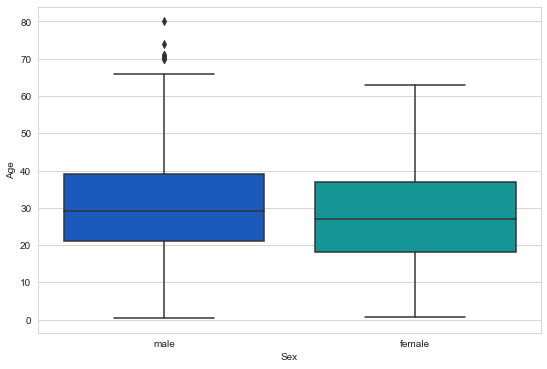

In [174]:
plt.figure(figsize=(9, 6))
sns.boxplot(x='Sex',y='Age',data=df1,palette='winter')

# Data Cleaning

In [49]:
#Dropping the columns which are not required in training the dataset

df = titanic.drop(['PassengerId','Name','Ticket'],axis=1)

In [50]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


# Handling Missing values in Cabin column

In [51]:
#Handling missing values and at the same time converting themn into numerical

df['Cabin'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) 
                                                     else len(x.split(" ")))
df['Cabin'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin, dtype: int64

In [74]:
x = "a b c d"
x.split(" ")

['a', 'b', 'c', 'd']

In [75]:
# df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)
#null value be replaced by 1 and others by 1
# To find the percentage of null values
# df['cabin_null'].mean()

In [77]:
#To find the values which are not null
#df[df['Cabin'].notnull()]['Cabin']

C:\Users\USER PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

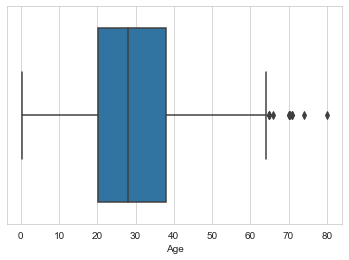

In [78]:
#Boxplot for Age column

sns.boxplot(df['Age'])

In [79]:
#we can see that outliers are present in the Age column so we will use median to replace it  with null values

In [80]:
df['Age'].median()

28.0

In [81]:
df['Age'].replace(np.NaN, df['Age'].median(), inplace= True)

In [82]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [83]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [84]:
#Most Frequent value
df['Embarked'].mode()

0    S
dtype: object

In [85]:
df['Embarked'].fillna('S',inplace= True)

In [87]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [88]:
# so we removed all the missing data

# To convert Categorical data to into Numerical for modelling

In [89]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin         int64
Embarked     object
dtype: object

In [90]:
#Now we can see that sex and Embarked column  data type is object , lets convert them with dummies technique

In [91]:
Embarked_dummies = pd.get_dummies(df['Embarked'],drop_first=True)

In [92]:
Embarked_dummies

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [93]:
sex_dummies = pd.get_dummies(df['Sex'],drop_first=True)

In [94]:
sex_dummies

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [95]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,0,S
1,1,1,female,38.0,1,0,71.2833,1,C
2,1,3,female,26.0,0,0,7.9250,0,S
3,1,1,female,35.0,1,0,53.1000,1,S
4,0,3,male,35.0,0,0,8.0500,0,S


In [96]:
df = pd.concat([df,sex_dummies,Embarked_dummies],axis=1)

In [97]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,0,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,1,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,0,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,1,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,0,S,1,0,1


In [98]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [99]:
df.head()

#now we are ready to build model(preprocessing is done)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1


# Applying Logistic Regression Algorithm

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
y = df['Survived']

In [102]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [103]:
x = df.drop('Survived',axis=1)

In [105]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,3,22.0,1,0,7.2500,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,1


# Splitting the Data

In [155]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
#Craeting Object for Logistic Regression
LR = LogisticRegression()

# Training the Data

In [158]:
LR.fit(X_train,Y_train)

C:\Users\USER PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Prediction

In [159]:
predictions = LR.predict(X_test)

In [160]:
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

# Evaluation

In [161]:
from sklearn.metrics import accuracy_score,confusion_matrix

# Accuracy

In [162]:
accuracy=accuracy_score(Y_test,predictions)
accuracy

0.8059701492537313

In [163]:
cf = confusion_matrix(Y_test,predictions)

In [164]:
cf

array([[136,  21],
       [ 31,  80]], dtype=int64)

# Confusion Matrix

<AxesSubplot:>

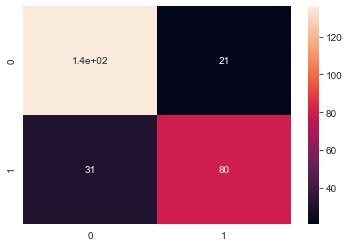

In [146]:
sns.heatmap(cf, annot=True)

# Classification Report

In [165]:
from sklearn.metrics import classification_report

In [166]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.72      0.75       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



# Another Method

In [167]:
#Here i have used diffrent techniques to handle missing values

In [168]:
df1 = titanic

In [169]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [170]:
#Checking for null values

df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [171]:
#There are missing values in Age, Cabin, Embarked

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

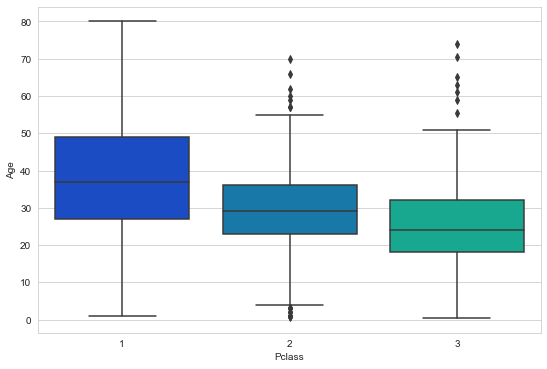

In [173]:
plt.figure(figsize=(9, 6))
sns.boxplot(x='Pclass',y='Age',data=df1,palette='winter')

In [175]:
#function to handle missing values in the Age column
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [183]:
df1['Age'] = df1[['Age','Pclass']].apply(impute_age,axis=1)

In [177]:
df1[df1['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [178]:
df1[df1['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S


In [179]:
df1['Cabin'] = df1.Cabin.apply(lambda x: 0 if pd.isna(x) 
                                                     else len(x.split(" ")))
df1['Cabin'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin, dtype: int64

In [180]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [186]:
#dropping the rows which has null value(That are in the Embarked column)
df1.dropna(inplace=True)

In [187]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [188]:
df1.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [189]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,0,S
1,1,1,female,38.0,1,0,71.2833,1,C
2,1,3,female,26.0,0,0,7.9250,0,S
3,1,1,female,35.0,1,0,53.1000,1,S
4,0,3,male,35.0,0,0,8.0500,0,S


In [190]:
df1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [191]:
sex_dummies = pd.get_dummies(df1['Sex'], drop_first=True)

In [192]:
sex_dummies

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [193]:
Embarked_dummies = pd.get_dummies(df1['Embarked'], drop_first=True)

In [194]:
Embarked_dummies

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [195]:
df1 = pd.concat([df1,sex_dummies,Embarked_dummies],axis=1)

In [196]:
df1.drop(['Sex','Embarked'], axis=1, inplace=True)

In [197]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1


# Applying Logistic Regression Algorithm

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
y = df1['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [200]:
x = df1.drop('Survived',axis=1)
x.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,3,22.0,1,0,7.2500,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,1


In [210]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [331]:
from sklearn.linear_model import LogisticRegression

In [332]:
LR = LogisticRegression()

In [333]:
LR.fit(X_train,Y_train)

C:\Users\USER PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [334]:
predictions = LR.predict(X_test)

In [335]:
predictions

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

# Evaluation

In [336]:
from sklearn.metrics import accuracy_score

In [337]:
acc_LR =accuracy_score(Y_test,predictions)
acc_LR

0.8202247191011236

In [338]:
cf = confusion_matrix(Y_test,predictions)
cf

array([[143,  24],
       [ 24,  76]], dtype=int64)

<AxesSubplot:>

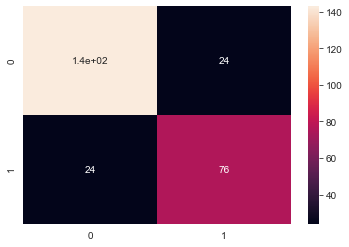

In [339]:
sns.heatmap(cf, annot=True)

In [340]:
from sklearn.metrics import classification_report

In [341]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       167
           1       0.76      0.76      0.76       100

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267



# Applying KNN Algorithm

In [342]:
from sklearn.neighbors import KNeighborsClassifier
# k =5
knn = KNeighborsClassifier(n_neighbors = 5)

In [343]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [344]:
pred_knn = knn.predict(X_test)

In [345]:
acc_knn =accuracy_score(Y_test,pred_knn)
acc_knn

0.7228464419475655

In [346]:
cf = confusion_matrix(Y_test,pred_knn)
cf

array([[137,  30],
       [ 44,  56]], dtype=int64)

<AxesSubplot:>

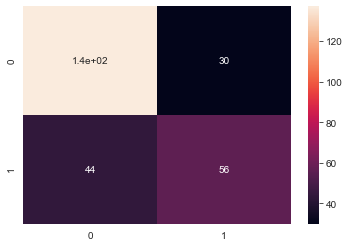

In [347]:
sns.heatmap(cf, annot=True)

In [348]:
print(classification_report(Y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       167
           1       0.65      0.56      0.60       100

    accuracy                           0.72       267
   macro avg       0.70      0.69      0.69       267
weighted avg       0.72      0.72      0.72       267



# Applying SVM Algorithm

In [349]:
from sklearn.svm import SVC

In [350]:
svc = SVC()

In [351]:
svc.fit(X_train, Y_train)

SVC()

In [352]:
pred_svc = svc.predict(X_test)

In [353]:
pred_svc

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [354]:
acc_SVM =accuracy_score(Y_test,pred_svc)
acc_SVM

0.6704119850187266

In [355]:
cf = confusion_matrix(Y_test,pred_svc)
cf

array([[153,  14],
       [ 74,  26]], dtype=int64)

<AxesSubplot:>

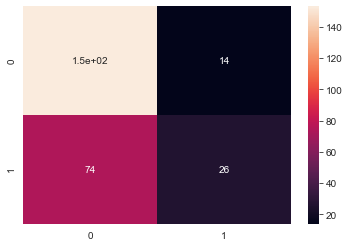

In [356]:
sns.heatmap(cf, annot=True)

In [357]:
print(classification_report(Y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.67      0.92      0.78       167
           1       0.65      0.26      0.37       100

    accuracy                           0.67       267
   macro avg       0.66      0.59      0.57       267
weighted avg       0.67      0.67      0.62       267



# Applying Decision Tree Algorithm

In [358]:
from sklearn import tree

In [359]:
DT = tree.DecisionTreeClassifier()

In [360]:
DT.fit(X_train,Y_train)

DecisionTreeClassifier()

In [361]:
DT_pred = DT.predict(X_test)

In [362]:
DT_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [363]:
acc_DT=accuracy_score(Y_test,DT_pred)
acc_DT

0.7677902621722846

In [364]:
cf = confusion_matrix(Y_test,DT_pred)
cf

array([[138,  29],
       [ 33,  67]], dtype=int64)

<AxesSubplot:>

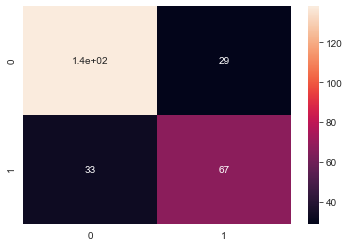

In [365]:
sns.heatmap(cf, annot=True)

In [366]:
print(classification_report(Y_test,DT_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       167
           1       0.70      0.67      0.68       100

    accuracy                           0.77       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.77      0.77      0.77       267



# Applying Random Forest Algorithm

In [406]:
from sklearn.ensemble import RandomForestClassifier

In [430]:
RF = RandomForestClassifier(n_estimators = 25)

In [431]:
RF.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=25)

In [432]:
RF_pred = RF.predict(X_test)

In [433]:
RF_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [434]:
RF_acc =accuracy_score(Y_test,RF_pred)
RF_acc

0.7752808988764045

In [435]:
cf = confusion_matrix(Y_test,RF_pred)
cf

array([[139,  28],
       [ 32,  68]], dtype=int64)

<AxesSubplot:>

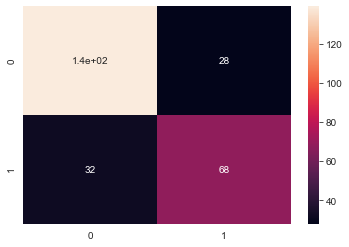

In [436]:
sns.heatmap(cf, annot=True)

In [437]:
print(classification_report(Y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       167
           1       0.71      0.68      0.69       100

    accuracy                           0.78       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.77      0.78      0.77       267



# Algorithm and its accuracy

# Algorithm                 Accuracy

Logistic Regression       0.8202247191011236
Random Forest             0.7752808988764045
Decision Tree             0.7640449438202247
KNN                       0.7228464419475655
SVM                       0.6704119850187266